In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from re import search

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
raw_data = pd.read_csv('../data/listings.csv')

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10109 non-null  int64  
 1   listing_url                                   10109 non-null  object 
 2   scrape_id                                     10109 non-null  int64  
 3   last_scraped                                  10109 non-null  object 
 4   name                                          10109 non-null  object 
 5   description                                   9910 non-null   object 
 6   neighborhood_overview                         6480 non-null   object 
 7   picture_url                                   10108 non-null  object 
 8   host_id                                       10109 non-null  int64  
 9   host_url                                      10109 non-null 

In [4]:
raw_data['price'].value_counts().sort_values(ascending=False)

$150.00      258
$100.00      216
$200.00      215
$75.00       177
$250.00      161
            ... 
$1,199.00      1
$1,133.00      1
$764.00        1
$476.00        1
$736.00        1
Name: price, Length: 879, dtype: int64

In [5]:
to_drop_columns = ['id',
                   'listing_url',
                   'scrape_id',
                   'last_scraped',
                   'name',
                   'description',
                   'neighborhood_overview',
                   'picture_url',
                   'host_id',
                   'host_url',
                   'host_name',
                   'host_since',
                   'host_location',
                   'host_about',
                   'host_response_time',
                   'host_response_rate',
                   'host_acceptance_rate',
                   'host_thumbnail_url',
                   'host_picture_url',
                   'host_neighbourhood',
                   'host_listings_count',
                   'host_total_listings_count',
                   'host_verifications',
                   'host_has_profile_pic',
                   'neighbourhood',
                   'neighbourhood_group_cleansed',
                   'bathrooms',
                   'minimum_minimum_nights',
                   'maximum_minimum_nights',
                   'minimum_maximum_nights',
                   'maximum_maximum_nights',
                   'minimum_nights_avg_ntm',
                   'maximum_nights_avg_ntm',
                   'calendar_updated',
                   'calendar_last_scraped'
                   'license',
                  ]

In [6]:
to_try = ['host_identity_verified',
          'latitude',
          'longitude',
          'property_type',
          'maximum_nights',
          'availability_30',
          'availability_60',
          'availability_90',
          'availability_365',
          'number_of_reviews_ltm',
          'number_of_reviews_l30d',
          'first_review',
          'last_review',
          'calculated_host_listings_count_entire_homes',
          'calculated_host_listings_count_private_rooms',
          'calculated_host_listings_count_shared_rooms'
         ]

In [7]:
to_keep = ['host_is_superhost',
           'neighbourhood_cleansed',
           'room_type',
           'accommodates',
           'bathrooms_text',
           'bedrooms',
           'beds',
           'amenities',
           'price',
           'minimum_nights',
           'has_availability',
           'number_of_reviews',
           'review_scores_rating',
           'review_scores_accuracy',
           'review_scores_cleanliness',
           'review_scores_checkin',
           'review_scores_communication',
           'review_scores_location',
           'review_scores_value',
           'instant_bookable',
           'calculated_host_listings_count',
           'reviews_per_month'
          ]

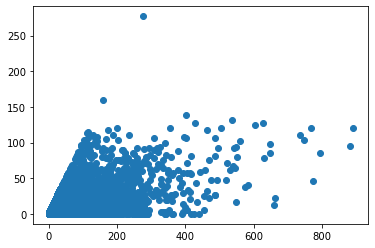

In [8]:
fig, ax = plt.subplots()
ax.scatter(raw_data['number_of_reviews'], raw_data['number_of_reviews_ltm'])

In [9]:
raw_to_keep = raw_data.loc[:, to_keep]

In [10]:
raw_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               9814 non-null   object 
 1   neighbourhood_cleansed          10109 non-null  int64  
 2   room_type                       10109 non-null  object 
 3   accommodates                    10109 non-null  int64  
 4   bathrooms_text                  10094 non-null  object 
 5   bedrooms                        9425 non-null   float64
 6   beds                            9886 non-null   float64
 7   amenities                       10109 non-null  object 
 8   price                           10109 non-null  object 
 9   minimum_nights                  10109 non-null  int64  
 10  has_availability                10109 non-null  object 
 11  number_of_reviews               10109 non-null  int64  
 12  review_scores_rating            

In [11]:
clean_to_keep = raw_to_keep.copy()

In [12]:
clean_to_keep['price'] = clean_to_keep['price'].apply(lambda x: x.replace('$', ''))
clean_to_keep['price'] = clean_to_keep['price'].apply(lambda x: x.replace(',', ''))
clean_to_keep['price'] = clean_to_keep['price'].astype('float64')

In [13]:
clean_to_keep['host_is_superhost'] = (clean_to_keep['host_is_superhost'] == 't')

In [14]:
clean_to_keep['entire_home'] = (clean_to_keep['room_type'] == 'Entire home/apt')

In [43]:
clean_to_keep.drop(columns='room_type', inplace=True)

In [15]:
clean_to_keep['shared_bathroom'] = clean_to_keep['bathrooms_text'].str.contains('shared')

In [16]:
clean_to_keep['shared_bathroom'] = clean_to_keep['shared_bathroom'].astype('bool')

In [17]:
clean_to_keep['bathrooms_text'] = clean_to_keep['bathrooms_text'].str.lower()

In [18]:
clean_to_keep['bathrooms_text'] = clean_to_keep['bathrooms_text'].str.replace('private ', '')
clean_to_keep['bathrooms_text'] = clean_to_keep['bathrooms_text'].str.replace('shared ', '')
clean_to_keep['bathrooms_text'] = clean_to_keep['bathrooms_text'].str.replace('half-bath', '0.5')
clean_to_keep['bathrooms_text'] = clean_to_keep['bathrooms_text'].str.replace(' bath', '')
clean_to_keep['bathrooms_text'] = clean_to_keep['bathrooms_text'].str.replace('s', '')

In [19]:
clean_to_keep['bathrooms'] = clean_to_keep['bathrooms_text'].astype('float64')

In [20]:
clean_to_keep['bathrooms'].value_counts()

1.0     5881
2.0     2026
2.5      690
1.5      628
3.0      374
3.5      160
4.0      119
4.5       69
5.0       33
0.0       32
5.5       24
6.0       16
6.5       14
0.5       14
7.0        4
8.0        4
7.5        3
9.0        1
17.0       1
10.5       1
Name: bathrooms, dtype: int64

In [21]:
clean_to_keep['has_availability'] = (clean_to_keep['has_availability'] == 't')

In [22]:
clean_to_keep['instant_bookable'] = (clean_to_keep['instant_bookable'] == 't')

In [23]:
clean_to_keep.drop(columns='bathrooms_text', inplace=True)

In [44]:
clean_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               10109 non-null  bool   
 1   neighbourhood_cleansed          10109 non-null  int64  
 2   accommodates                    10109 non-null  int64  
 3   bedrooms                        9425 non-null   float64
 4   beds                            9886 non-null   float64
 5   amenities                       10109 non-null  object 
 6   price                           10109 non-null  float64
 7   minimum_nights                  10109 non-null  int64  
 8   has_availability                10109 non-null  bool   
 9   number_of_reviews               10109 non-null  int64  
 10  review_scores_rating            7596 non-null   float64
 11  review_scores_accuracy          7518 non-null   float64
 12  review_scores_cleanliness       

In [25]:
clean_to_keep.corr()

,host_is_superhost,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,has_availability,number_of_reviews,review_scores_rating,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,entire_home,shared_bathroom,bathrooms
host_is_superhost,1.000000,0.008777,0.031364,0.038240,0.041948,-0.065444,0.035279,0.149508,0.343562,0.230823,...,0.154995,0.160996,0.162142,0.242561,0.055286,0.134353,0.290250,0.113364,-0.052662,-0.006977
neighbourhood_cleansed,0.008777,1.000000,-0.067625,-0.027620,-0.039549,-0.069560,0.044551,-0.026984,-0.091053,-0.029236,...,-0.014493,-0.016492,-0.092207,0.030182,-0.033100,0.097279,-0.060300,-0.166656,0.143966,-0.008037
accommodates,0.031364,-0.067625,1.000000,0.844689,0.738495,0.421576,-0.056903,0.106588,-0.002064,-0.009052,...,0.016830,-0.019400,-0.002149,-0.061344,0.137327,0.003100,0.022475,0.409236,-0.273686,0.722016
bedrooms,0.038240,-0.027620,0.844689,1.000000,0.763515,0.462555,-0.020995,0.096927,-0.031507,0.039160,...,0.048651,0.006233,0.017511,-0.011177,0.045507,-0.037783,-0.037105,0.370443,-0.233346,0.830734
beds,0.041948,-0.039549,0.738495,0.763515,1.000000,0.390254,-0.029900,0.080355,-0.000518,-0.005228,...,0.016376,-0.023350,0.003020,-0.046901,0.107615,0.013616,0.017033,0.253483,-0.164288,0.657632
price,-0.065444,-0.069560,0.421576,0.462555,0.390254,1.000000,-0.005078,-0.001207,-0.074600,0.028279,...,0.015653,0.004912,0.015412,-0.048276,0.012165,-0.008311,-0.080124,0.153408,-0.123304,0.495174
minimum_nights,0.035279,0.044551,-0.056903,-0.020995,-0.029900,-0.005078,1.000000,0.057337,-0.062474,0.019877,...,0.024381,0.013573,0.023489,0.006099,0.006762,0.214562,-0.093213,0.030031,0.000205,0.002997
has_availability,0.149508,-0.026984,0.106588,0.096927,0.080355,-0.001207,0.057337,1.000000,0.102320,0.050437,...,0.043080,0.025686,0.069424,0.055599,0.202510,0.069267,0.111927,0.132365,-0.026780,0.083097
number_of_reviews,0.343562,-0.091053,-0.002064,-0.031507,-0.000518,-0.074600,-0.062474,0.102320,1.000000,0.087363,...,0.091126,0.084941,0.104739,0.103393,0.076551,-0.085249,0.633599,0.104721,-0.061711,-0.088980
review_scores_rating,0.230823,-0.029236,-0.009052,0.039160,-0.005228,0.028279,0.019877,0.050437,0.087363,1.000000,...,0.648106,0.724399,0.547625,0.741475,-0.096734,-0.135628,0.030420,0.017778,-0.021020,0.041585


In [26]:
clean_to_keep['neighbourhood_cleansed'].value_counts()

78704    1798
78702    1236
78701     752
78741     625
78703     514
78745     492
78705     484
78751     455
78723     328
78758     262
78746     259
78734     217
78757     200
78721     199
78722     171
78744     166
78748     142
78756     130
78752     124
78729     116
78731     116
78754     114
78735     107
78749     102
78727     100
78737      98
78753      96
78759      87
78733      68
78724      62
78717      62
78728      56
78732      55
78736      50
78738      47
78747      45
78750      44
78725      41
78730      36
78739      27
78726      12
78742       7
78719       6
78712       1
Name: neighbourhood_cleansed, dtype: int64

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

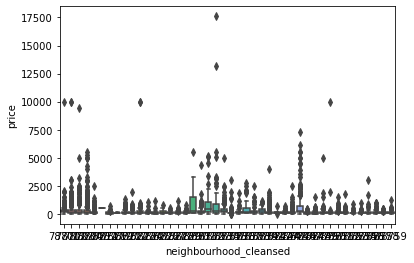

In [27]:
sns.boxplot(x='neighbourhood_cleansed', y='price', data=clean_to_keep)

In [28]:
clean_to_keep.describe()

,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,bathrooms
count,10109.000000,10109.000000,9425.000000,9886.000000,10109.000000,10109.00000,10109.000000,7596.000000,7518.000000,7518.000000,7517.000000,7517.000000,7512.000000,7513.000000,10109.000000,7707.000000,10094.000000
mean,78723.036898,4.570383,1.919363,2.479061,266.578297,7.99545,32.476605,95.798973,9.732243,9.573025,9.839298,9.823866,9.768504,9.554639,12.993075,1.325255,1.553249
std,20.795429,3.044928,1.241213,2.655068,525.346005,23.56830,68.589926,7.939286,0.772860,0.891881,0.648808,0.695419,0.650720,0.857050,39.873362,1.781090,0.879556
min,78701.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.010000,0.000000
25%,78704.000000,2.000000,1.000000,1.000000,86.000000,1.00000,1.000000,95.000000,10.000000,9.000000,10.000000,10.000000,10.000000,9.000000,1.000000,0.160000,1.000000
50%,78722.000000,4.000000,2.000000,2.000000,148.000000,2.00000,6.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.690000,1.000000
75%,78745.000000,6.000000,2.000000,3.000000,265.000000,3.00000,30.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.870000,2.000000
max,78759.000000,16.000000,23.000000,132.000000,17599.000000,999.00000,891.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,237.000000,32.940000,17.000000


In [29]:
clean_to_keep[clean_to_keep['price'] == 0]

,host_is_superhost,neighbourhood_cleansed,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,has_availability,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,entire_home,shared_bathroom,bathrooms
3707,True,78703,Entire home/apt,4,2.0,2.0,"[""Carbon monoxide alarm"", ""Refrigerator"", ""Dis...",0.0,1,False,...,10.0,10.0,10.0,10.0,False,1,4.5,True,False,1.5
8000,False,78746,Hotel room,0,NaN,NaN,"[""Room service"", ""Valet parking \u2014 $20/day...",0.0,1,True,...,NaN,NaN,NaN,NaN,False,1,NaN,False,True,NaN
8753,False,78704,Hotel room,0,NaN,NaN,"[""Room service"", ""Pack \u2019n Play/travel cri...",0.0,1,True,...,NaN,NaN,NaN,NaN,False,1,NaN,False,True,NaN


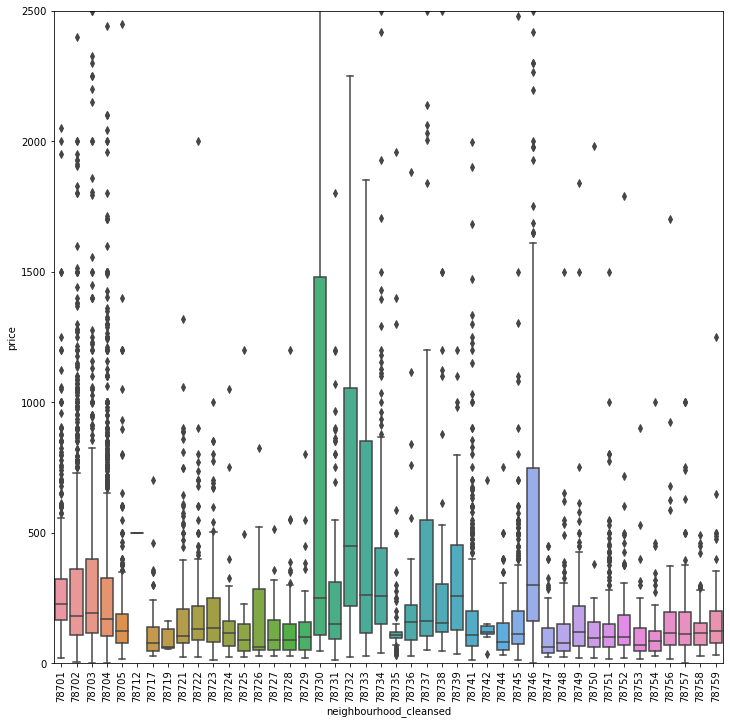

In [30]:
plt.figure(figsize =(12, 12))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=clean_to_keep)
plt.ylim((0,2500))
plt.xticks(rotation=90);

In [31]:
neighborhoods = pd.get_dummies(clean_to_keep['neighbourhood_cleansed'])
neighborhoods['price'] = clean_to_keep['price']
neighborhoods

,78701,78702,78703,78704,78705,78712,78717,78719,78721,78722,...,78750,78751,78752,78753,78754,78756,78757,78758,78759,price
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,114.0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,104.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,180.0
10105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,144.0
10106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,170.0
10107,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,275.0


In [33]:
zipcode = pd.DataFrame()

In [34]:
zipcode['78701'] = neighborhoods[78701]
zipcode['78702'] = neighborhoods[78702]
zipcode['78703'] = neighborhoods[78703]
zipcode['78704'] = neighborhoods[78704]
zipcode['78705'] = neighborhoods[78705]
zipcode['78720'] = neighborhoods.iloc[:,5:17].sum(axis=1)
zipcode['78730'] = neighborhoods.iloc[:,17:27].sum(axis=1)
zipcode['78740'] = neighborhoods.iloc[:,27:31].sum(axis=1)
zipcode['78746'] = neighborhoods[78746]
zipcode['78750'] = neighborhoods.iloc[:,32:38].sum(axis=1)
zipcode['78759'] = neighborhoods.iloc[:,38:44].sum(axis=1)

In [35]:
zipcode

,78701,78702,78703,78704,78705,78720,78730,78740,78746,78750,78759
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10104,0,0,0,0,0,0,0,1,0,0,0
10105,0,0,0,0,0,0,0,0,1,0,0
10106,0,0,0,0,0,0,0,0,1,0,0
10107,0,0,1,0,0,0,0,0,0,0,0


In [36]:
clean_to_keep['amenities']

0        ["Dining table", "Cleaning before checkout", "...
1        ["Lock on bedroom door", "Heating", "Dryer", "...
2        ["Free street parking", "Air conditioning", "H...
3        ["Heating", "Cooking basics", "Washer", "TV", ...
4        ["Heating", "Shampoo", "Fire extinguisher", "I...
                               ...                        
10104    ["Heating", "Dryer", "Iron", "Washer", "TV", "...
10105    ["Cooking basics", "Dryer", "Iron", "Washer", ...
10106    ["Cooking basics", "Dryer", "Iron", "Washer", ...
10107    ["Pack \u2019n Play/travel crib", "Heating", "...
10108    ["Long term stays allowed", "Hair dryer", "Bod...
Name: amenities, Length: 10109, dtype: object

In [37]:
test_amen = clean_to_keep['amenities'].str.replace('[^\w\s]',' ').str.split('    ')
test_amen = test_amen.apply(lambda x: [item.strip() for item in x])
test_amen

/home/reza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0        [Dining table, Cleaning before checkout, Centr...
1        [Lock on bedroom door, Heating, Dryer, Iron, W...
2        [Free street parking, Air conditioning, Hanger...
3        [Heating, Cooking basics, Washer, TV, Luggage ...
4        [Heating, Shampoo, Fire extinguisher, Indoor f...
                               ...                        
10104    [Heating, Dryer, Iron, Washer, TV, Hair dryer,...
10105    [Cooking basics, Dryer, Iron, Washer, TV, Show...
10106    [Cooking basics, Dryer, Iron, Washer, TV, Show...
10107    [Pack  u2019n Play travel crib, Heating, Cooki...
10108    [Long term stays allowed, Hair dryer, Body soa...
Name: amenities, Length: 10109, dtype: object

In [38]:
amenities_dict = dict()
for ind, item in zip(test_amen.index, test_amen.values):
    for amenity in item:
        if amenity in amenities_dict.keys():
            amenities_dict[amenity] += 1
        else:
            amenities_dict[amenity] = 1
sorted_amenities = sorted(amenities_dict.items(), key=lambda x: x[1], reverse=True)  
sorted_amenities

[('Wifi', 9733),
 ('Air conditioning', 9595),
 ('Smoke alarm', 9407),
 ('Heating', 9295),
 ('Essentials', 9208),
 ('Kitchen', 9202),
 ('Free parking on premises', 8247),
 ('Washer', 7968),
 ('Dryer', 7914),
 ('Shampoo', 7797),
 ('Hangers', 7746),
 ('Long term stays allowed', 7739),
 ('Hair dryer', 7401),
 ('Iron', 7282),
 ('Carbon monoxide alarm', 6983),
 ('Fire extinguisher', 6925),
 ('Dedicated workspace', 6757),
 ('TV', 6299),
 ('Hot water', 6198),
 ('Coffee maker', 5613),
 ('Dishes and silverware', 5535),
 ('Refrigerator', 5453),
 ('Microwave', 5281),
 ('Cooking basics', 5025),
 ('Private entrance', 4749),
 ('Stove', 4669),
 ('Oven', 4653),
 ('First aid kit', 4345),
 ('Dishwasher', 4252),
 ('Bed linens', 4243),
 ('Free street parking', 4034),
 ('Patio or balcony', 4025),
 ('Extra pillows and blankets', 3318),
 ('Pool', 3166),
 ('Backyard', 3078),
 ('Cable TV', 2520),
 ('TV with standard cable', 2286),
 ('BBQ grill', 2098),
 ('Gym', 2079),
 ('Bathtub', 1989),
 ('Keypad', 1966),
 ('L

In [39]:
amenities = pd.DataFrame()
amenities['tv'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'tv' in x else 0)
amenities['washer_dryer'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if '"washer"' in x or '"dryer"' in x else 0)
amenities['long_term'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'long term' in x else 0)
amenities['refrigerator'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'refrigerator' in x else 0)
amenities['private_entrance'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'private entrance' in x else 0)
amenities['dishwasher'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if '"dishwasher"' in x else 0)
amenities['balcony'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'patio' in x or 'balcony' in x else 0)
amenities['yard'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'yard' in x else 0)
amenities['pool'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if '"pool"' in x else 0)
amenities['bbq'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'bbq' in x or 'barbeque' in x else 0)
amenities['gym'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'gym' in x else 0)
amenities['single_level'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'single level' in x else 0)
amenities['breakfast'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if '"breakfast"' in x else 0)
amenities['hottub'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'hot tub' in x else 0)
amenities['lake_access'] = clean_to_keep['amenities'].str.lower().apply(lambda x: 1 if 'lake access' in x else 0)

In [40]:
amenities

,tv,washer_dryer,long_term,refrigerator,private_entrance,dishwasher,balcony,yard,pool,bbq,gym,single_level,breakfast,hottub,lake_access
0,1,0,1,1,1,1,1,1,0,0,0,1,1,0,0
1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0
3,1,1,1,1,1,0,1,1,0,1,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10104,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0
10105,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0
10106,1,1,1,1,1,1,1,0,1,1,1,0,0,0,0
10107,1,1,1,0,1,0,0,0,0,0,0,0,1,0,0


In [48]:
clean_to_keep.drop(columns=['neighbourhood_cleansed', 'amenities'], inplace=True)
clean_to_keep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10109 entries, 0 to 10108
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_is_superhost               10109 non-null  bool   
 1   accommodates                    10109 non-null  int64  
 2   bedrooms                        9425 non-null   float64
 3   beds                            9886 non-null   float64
 4   price                           10109 non-null  float64
 5   minimum_nights                  10109 non-null  int64  
 6   has_availability                10109 non-null  bool   
 7   number_of_reviews               10109 non-null  int64  
 8   review_scores_rating            7596 non-null   float64
 9   review_scores_accuracy          7518 non-null   float64
 10  review_scores_cleanliness       7518 non-null   float64
 11  review_scores_checkin           7517 non-null   float64
 12  review_scores_communication     

In [58]:
all_listings = pd.concat([clean_to_keep.drop(columns='price'), zipcode, amenities], axis=1)
all_listings['price'] = clean_to_keep['price']

In [94]:
listings = all_listings[(all_listings['price'] >= 10) & (all_listings['price'] < 4000)]

In [95]:
listings = listings.dropna()
listings.describe()

,accommodates,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,...,balcony,yard,pool,bbq,gym,single_level,breakfast,hottub,lake_access,price
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.00000,6930.000000,6930.000000,...,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,4.798124,1.943579,2.616595,6.742857,39.634776,95.791486,9.731890,9.56710,9.842136,9.823810,...,0.466378,0.397980,0.260606,0.217172,0.145743,0.155844,0.114286,0.068110,0.059740,225.726551
std,3.174180,1.251406,2.455559,21.287400,68.891529,8.010958,0.776685,0.89653,0.649755,0.703154,...,0.498904,0.489517,0.438997,0.412350,0.352874,0.362734,0.318181,0.251952,0.237022,285.827483
min,1.000000,1.000000,0.000000,1.000000,1.000000,20.000000,2.000000,2.00000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,2.000000,1.000000,1.000000,1.000000,4.000000,95.000000,10.000000,9.00000,10.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000
50%,4.000000,2.000000,2.000000,2.000000,13.000000,98.000000,10.000000,10.00000,10.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,139.000000
75%,6.000000,3.000000,3.000000,3.000000,45.000000,100.000000,10.000000,10.00000,10.000000,10.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,249.000000
max,16.000000,23.000000,61.000000,999.000000,891.000000,100.000000,10.000000,10.00000,10.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3357.000000


<AxesSubplot:>

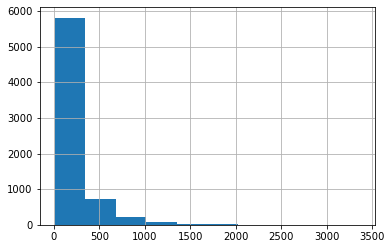

In [96]:
listings['price'].hist()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(listings.drop(columns='price'), 
                                                    listings['price'])

In [98]:
y_test

7011    200.0
1911     75.0
4581     65.0
7990     52.0
2371    219.0
        ...  
6644     50.0
1609     95.0
3415    875.0
461     125.0
7915     75.0
Name: price, Length: 1733, dtype: float64

In [99]:
X_test

,host_is_superhost,accommodates,bedrooms,beds,minimum_nights,has_availability,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,...,dishwasher,balcony,yard,pool,bbq,gym,single_level,breakfast,hottub,lake_access
7011,False,6,2.0,3.0,1,True,30,84.0,8.0,9.0,...,0,1,0,0,0,0,0,0,0,1
1911,False,2,1.0,1.0,4,True,11,98.0,10.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4581,False,4,1.0,1.0,3,True,1,60.0,6.0,6.0,...,0,0,0,1,0,0,0,1,0,0
7990,False,2,1.0,1.0,28,True,1,20.0,10.0,2.0,...,1,1,0,1,0,0,0,0,0,0
2371,False,6,2.0,3.0,1,True,103,95.0,9.0,10.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6644,False,2,1.0,1.0,1,True,21,94.0,10.0,10.0,...,0,0,0,0,0,0,0,1,0,0
1609,False,4,2.0,2.0,3,True,14,81.0,9.0,9.0,...,0,0,0,1,0,1,0,0,0,0
3415,False,8,4.0,7.0,4,True,7,100.0,10.0,10.0,...,1,1,1,1,1,0,1,0,0,0
461,True,4,1.0,1.0,30,True,43,98.0,10.0,10.0,...,1,1,1,1,1,0,1,0,0,0


In [100]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [101]:
dtr.predict(X_test)

array([261., 190.,  89., ..., 999., 150.,  98.])

In [102]:
resid_dtr = dtr.predict(X_test) - y_test

<AxesSubplot:>

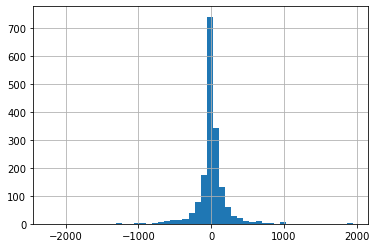

In [105]:
resid_dtr.hist(bins=50)

In [ ]:
X